<h1> Supervised Classification Model

In [195]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score, f1_score, classification_report

<h2> Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression

<h3> Raw data

In [197]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_score_lr = lr.predict_proba(X_test_scaled)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr[:,1])
roc_auc = auc(fpr_lr, tpr_lr)
roc_auc

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.973907005031907

In [198]:
y_pred = np.round(y_score_lr[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

105 transactions classified as fraudulent out of 155


<h3> Undersampling

In [199]:
lr = LogisticRegression()
lr.fit(X_undersamp, y_undersamp)
y_score_lr_u = lr.predict_proba(X_test_scaled)
fpr_lr_u, tpr_lr_u, _ = roc_curve(y_test, y_score_lr_u[:,1])
roc_auc = auc(fpr_lr_u, tpr_lr_u)
roc_auc

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9773968882662463

In [200]:
y_pred = np.round(y_score_lr_u[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

169 transactions classified as fraudulent out of 155


<h3> Oversampling

In [201]:
lr = LogisticRegression()
lr.fit(X_oversamp, y_oversamp)
y_score_lr_o = lr.predict_proba(X_test_scaled)
fpr_lr_o, tpr_lr_o, _ = roc_curve(y_test, y_score_lr_o[:,1])
roc_auc = auc(fpr_lr_o, tpr_lr_o)
roc_auc

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9742421881382548

In [202]:
y_pred = np.round(y_score_lr_o[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

150 transactions classified as fraudulent out of 155


<h3> Comparison

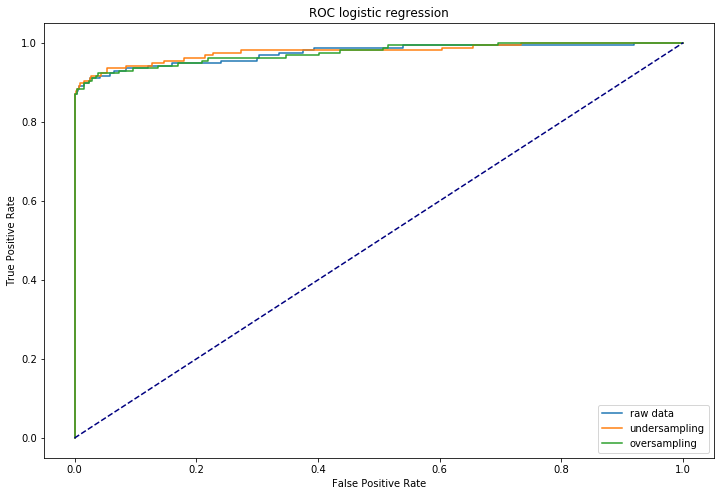

In [203]:
plt.figure(figsize=(12,8))

plt.plot(fpr_lr, tpr_lr, label='raw data')
plt.plot(fpr_lr_u, tpr_lr_u, label='undersampling')
plt.plot(fpr_lr_o, tpr_lr_o, label='oversampling')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC logistic regression')
plt.legend(loc="lower right")
plt.show()

-> Best Model: LR with Undersampling

In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.80      0.77      0.79       155

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



<h2> XG Boost

In [205]:
import xgboost as xgb

<h3> Raw data

In [206]:
xg = xgb.XGBClassifier()
xg.fit(X_train_scaled, y_train)
y_score_xg = xg.predict_proba(X_test_scaled)
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_score_xg[:,1])
roc_auc = auc(fpr_xg, tpr_xg)
roc_auc

0.9805995851626822

In [207]:
y_pred = np.round(y_score_xg[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

131 transactions classified as fraudulent out of 155


<h3> Undersampling

In [208]:
xg = xgb.XGBClassifier()
xg.fit(X_undersamp, y_undersamp)
y_score_xg_u = xg.predict_proba(X_test_scaled)
fpr_xg_u, tpr_xg_u, _ = roc_curve(y_test, y_score_xg_u[:,1])
roc_auc = auc(fpr_xg_u, tpr_xg_u)
roc_auc

0.9825965003585575

In [209]:
y_pred = np.round(y_score_xg_u[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

169 transactions classified as fraudulent out of 155


<h3> Oversampling

In [210]:
xg = xgb.XGBClassifier()
xg.fit(X_oversamp, y_oversamp)
y_score_xg_o = xg.predict_proba(X_test_scaled)
fpr_xg_o, tpr_xg_o, _ = roc_curve(y_test, y_score_xg_o[:,1])
roc_auc = auc(fpr_xg_o, tpr_xg_o)
roc_auc

0.9804081654265925

In [211]:
y_pred = np.round(y_score_xg_o[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

152 transactions classified as fraudulent out of 155


<h3> Comparison

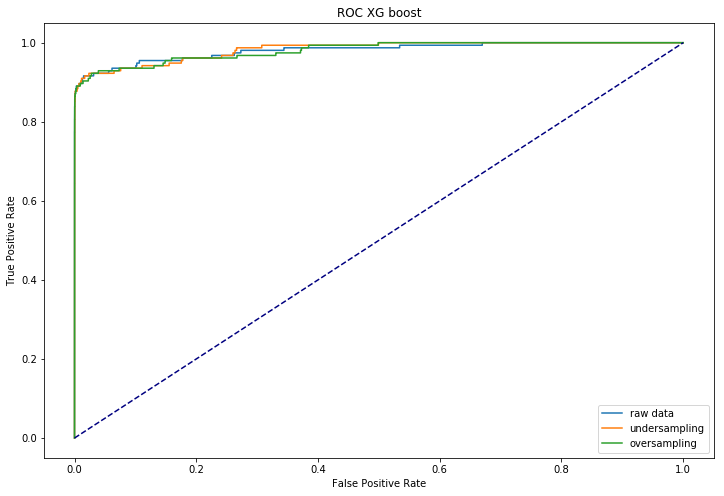

In [212]:
plt.figure(figsize=(12,8))

plt.plot(fpr_xg, tpr_xg, label='raw data')
plt.plot(fpr_xg_u, tpr_xg_u, label='undersampling')
plt.plot(fpr_xg_o, tpr_xg_o, label='oversampling')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC XG boost')
plt.legend(loc="lower right")
plt.show()

-> Best Model: LR with Raw data

<h2> LGBM

In [398]:
import lightgbm as lgb

<h3> Raw data

In [399]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
y_score_lg = lgbm.predict_proba(X_test_scaled)
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_lg[:,1])
roc_auc = auc(fpr_lg, tpr_lg)
roc_auc

0.6412328172325419

In [400]:
y_pred = np.round(y_score_lg[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

713 transactions classified as fraudulent out of 155


<h3> Undersampling

In [401]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_undersamp, y_undersamp)
y_score_lg_u = lgbm.predict_proba(X_test_scaled)
fpr_lg_u, tpr_lg_u, _ = roc_curve(y_test, y_score_lg_u[:,1])
roc_auc = auc(fpr_lg_u, tpr_lg_u)
roc_auc

0.9818412604276667

In [402]:
y_pred = np.round(y_score_lg_u[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

170 transactions classified as fraudulent out of 155


<h3> Oversampling

In [403]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_oversamp, y_oversamp)
y_score_lg_o = lgbm.predict_proba(X_test_scaled)
fpr_lg_o, tpr_lg_o, _ = roc_curve(y_test, y_score_lg_o[:,1])
roc_auc = auc(fpr_lg_o, tpr_lg_o)
roc_auc

0.9792781800412115

In [404]:
y_pred = np.round(y_score_lg_o[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

145 transactions classified as fraudulent out of 155


<h3> Comparison

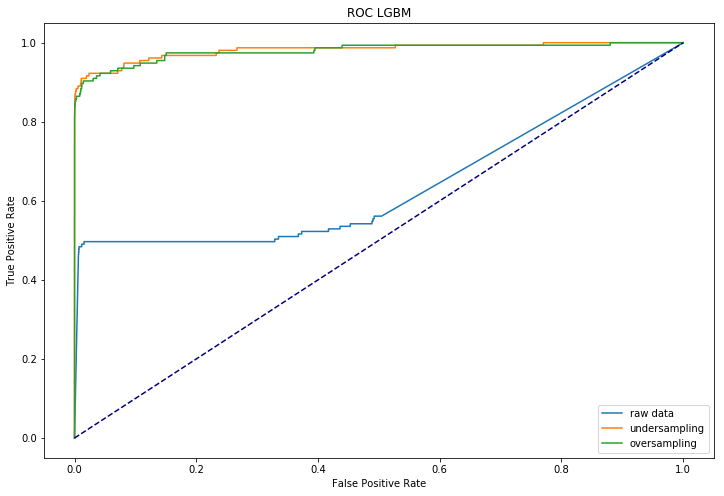

In [405]:
plt.figure(figsize=(12,8))

plt.plot(fpr_lg, tpr_lg, label='raw data')
plt.plot(fpr_lg_u, tpr_lg_u, label='undersampling')
plt.plot(fpr_lg_o, tpr_lg_o, label='oversampling')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LGBM')
plt.legend(loc="lower right")
plt.show()

-> Best Model: LR with Oversampling

<h1> Anomaly detection model (Unsupervised)

- Ratio of Class 1 in y: 0.17 %
- Ratio of Class 1 in y_undersamp: 0.99 %
- Ratio of Class 1 in y_oversamp: 0.99 %

In [221]:
X_train_inliers = X_train_scaled[y_train==0]
X_train_inliers.shape

(199027, 32)

In [222]:
X_test_scaled.shape

(85443, 32)

<h2> Gaussian distribution based

In [223]:
from sklearn.covariance import EllipticEnvelope

In [224]:
G = EllipticEnvelope(random_state=0)

In [225]:
G.fit(X_train_inliers)
y_predG = G.predict(X_test_scaled)

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:646: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [226]:
#y_predG = G.fit_predict(X_test)

In [227]:
# predict returns 1 for an inlier and -1 for an outlier
y_predG[y_predG == 1] = 0
y_predG[y_predG == -1] = 1

In [228]:
print(classification_report(y_test, y_predG))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85288
           1       0.02      0.87      0.03       155

   micro avg       0.91      0.91      0.91     85443
   macro avg       0.51      0.89      0.49     85443
weighted avg       1.00      0.91      0.95     85443



In [229]:
print(y_predG.sum(), "transactions classified as fraudulent out of", y_test.sum())

7935 transactions classified as fraudulent out of 155


In [230]:
y_score_g = -G.score_samples(X_test_scaled)
fpr_G, tpr_G, _ = roc_curve(y_test, y_score_g)
roc_auc = auc(fpr_G, tpr_G)
roc_auc

0.921240442251075

<h2> Local Outlier Factor (LOF)

!!! LOF takes a long time to compute.

In [231]:
from sklearn.neighbors import LocalOutlierFactor

In [232]:
LOF = LocalOutlierFactor(contamination="auto", novelty=True) 

In [233]:
#LOF.fit(X_train_inliers)
#y_predLOF = LOF.predict(X_test_scaled) #assign novelty to True

In [234]:
y_predLOF[y_predLOF == 1] = 0
y_predLOF[y_predLOF == -1] = 1

NameError: name 'y_predLOF' is not defined

In [ ]:
n_errors = (y_predLOF != y_test).sum()
X_scores = LOF.negative_outlier_factor_
n_errors, LOF.offset_

In [ ]:
print(classification_report(y_test, y_predLOF))

In [ ]:
print(y_predLOF.sum(), "transactions classified as fraudulent out of", y_test.sum())

In [ ]:
y_score_lof = -LOF.score_samples(X_test_scaled)
fpr_LOF, tpr_LOF, _ = roc_curve(y_test, y_score_lof)
roc_auc = auc(fpr_LOF, tpr_LOF)
roc_auc

<h2> Isolation Forest

In [235]:
from sklearn.ensemble import IsolationForest

In [236]:
IF = IsolationForest(n_estimators=100, contamination="auto", behaviour="new", random_state=0)
IF.fit(X_train_inliers)
y_predIF = IF.predict(X_test_scaled)

In [237]:
#y_predIF = IF.fit_predict(X_test)

In [238]:
y_predIF[y_predIF == 1] = 0
y_predIF[y_predIF == -1] = 1

In [239]:
print(classification_report(y_test, y_predIF))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85288
           1       0.05      0.81      0.09       155

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.52      0.89      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [240]:
print(y_predIF.sum(), "transactions classified as fraudulent out of", y_test.sum())

2642 transactions classified as fraudulent out of 155


In [241]:
y_score_if = -IF.score_samples(X_test_scaled)
fpr_IF, tpr_IF, _ = roc_curve(y_test, y_score_if)
roc_auc = auc(fpr_IF, tpr_IF)
roc_auc

0.9507023640583254

<h2> Comparison

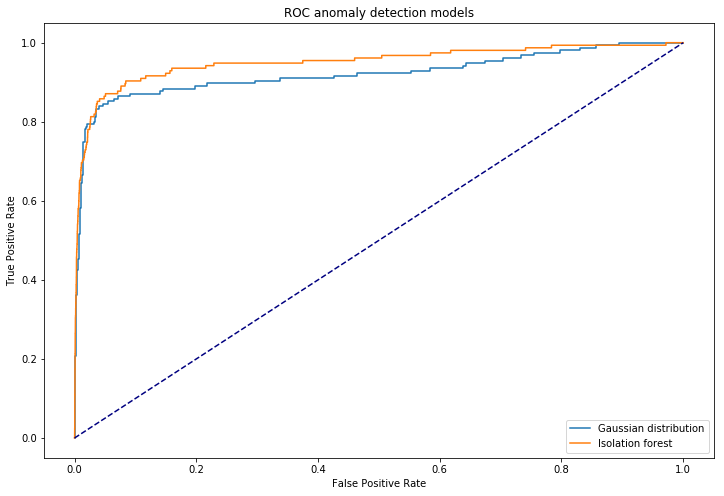

In [242]:
plt.figure(figsize=(12,8))

plt.plot(fpr_G, tpr_G, label='Gaussian distribution')
#plt.plot(fpr_LOF, tpr_LOF, label='Local Outlier Factor')
plt.plot(fpr_IF, tpr_IF, label='Isolation forest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC anomaly detection models')
plt.legend(loc="lower right")
plt.show()

<h1> Comparison of both methods

<h2> ROC AUC

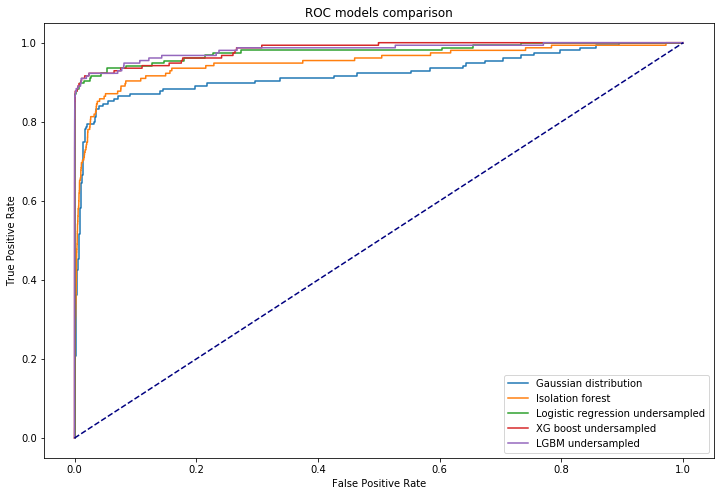

In [243]:
plt.figure(figsize=(12,8))

plt.plot(fpr_G, tpr_G, label='Gaussian distribution')
#plt.plot(fpr_LOF, tpr_LOF, label='Local Outlier Factor')
plt.plot(fpr_IF, tpr_IF, label='Isolation forest')
plt.plot(fpr_lr_u, tpr_lr_u, label='Logistic regression undersampled')
plt.plot(fpr_xg_u, tpr_xg_u, label='XG boost undersampled')
plt.plot(fpr_lg_u, tpr_lg_u, label='LGBM undersampled')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC models comparison')
plt.legend(loc="lower right")
plt.show()

<h2> Recall / Precsion tradeoff

In [394]:
ytest = y_test.values.reshape(-1,1)

In [513]:
precision_lr , recall_lr, threshold_lr = precision_recall_curve(ytest, y_score_lr_u[:,1])
precision_xg_u , recall_xg_u, threshold_xg_u = precision_recall_curve(ytest, y_score_xg_u[:,1])
precision_lg_o , recall_lg_o, threshold_lg_o = precision_recall_curve(ytest, y_score_lg_o[:,1])

In [514]:
precision_g , recall_g, threshold_g = precision_recall_curve(ytest, y_score_g)
precision_if , recall_if, threshold_if = precision_recall_curve(ytest, y_score_if)

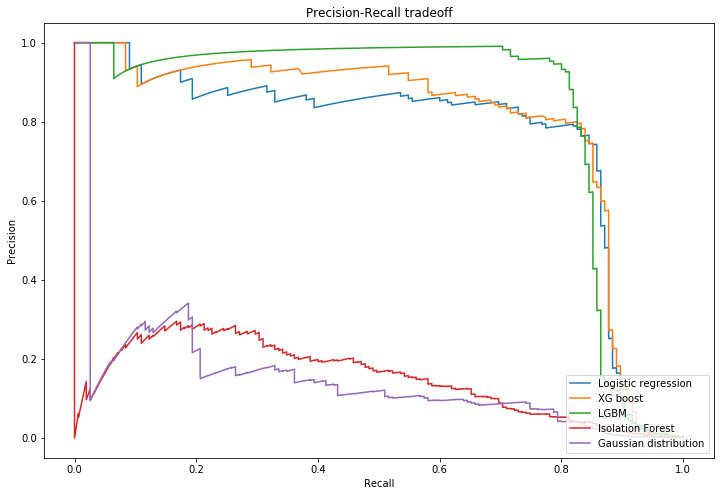

In [515]:
plt.figure(figsize=(12,8))
plt.plot(recall_lr, precision_lr, label="Logistic regression")
plt.plot(recall_xg_u, precision_xg_u, label="XG boost")
plt.plot(recall_lg_o, precision_lg_o, label="LGBM")
plt.plot(recall_if, precision_if, label="Isolation Forest")
plt.plot(recall_g, precision_g, label="Gaussian distribution")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall tradeoff")
plt.legend(loc="lower right")
plt.show()